# Mask R-CNN

## PREREQUISITES

### Nvidia - TensorFlow

2.11.0 -> 2.5.0

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install -U -qq tensorflow==2.5.0
exit()

--2023-04-22 09:37:18--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   151MB/s    in 2.7s    

2023-04-22 09:37:21 (151 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.7.0.84-1+cuda11.8) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [ ]:
!pip install -U -qq numpy==1.20
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 78.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.20.0 which is incompatible.
pandas 1.5.3 requires numpy>=1.20.3; python_version < "3.10", but you have numpy 1.20.0 which is incompatible.
optax 0.1.4 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
ml-dtypes 0.1.0 requires numpy>1.20, but you have numpy 1.20.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.20.0 which is incompatible.
librosa 0.10.0.post2 requires typing-extensions>=4.1.1, but you have typing-extensions 3.7.4.3 which is incompatible.
jaxlib 0.4.7+cuda11.cudnn86 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
jax 0.4.8

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4991265607006956454, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14464909312
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3047697006974430727
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
!nvidia-smi

Wed Mar 29 15:34:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |    257MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Dataset Loading
https://github.com/LouiseMassager/PandaPush_Depth_Reconstruction/tree/master/ML_training

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp /content/drive/MyDrive/images.zip /content
!unzip images.zip

Archive:  images.zip
   creating: images/
   creating: images/depth/
  inflating: images/depth/186.jpg    
  inflating: images/depth/85.jpg     
  inflating: images/depth/208.jpg    
  inflating: images/depth/181.jpg    
  inflating: images/depth/194.jpg    
  inflating: images/depth/88.jpg     
  inflating: images/depth/235.jpg    
  inflating: images/depth/91.jpg     
  inflating: images/depth/89.jpg     
  inflating: images/depth/90.jpg     
  inflating: images/depth/94.jpg     
  inflating: images/depth/92.jpg     
  inflating: images/depth/67.jpg     
  inflating: images/depth/142.jpg    
  inflating: images/depth/100.jpg    
  inflating: images/depth/0.jpg      
  inflating: images/depth/1.jpg      
  inflating: images/depth/2.jpg      
  inflating: images/depth/3.jpg      
  inflating: images/depth/4.jpg      
  inflating: images/depth/5.jpg      
  inflating: images/depth/6.jpg      
  inflating: images/depth/7.jpg      
  inflating: images/depth/8.jpg      
  inflating: images

In [ ]:
image_name='images'

### Mask-RCNN loading

In [ ]:
!git clone https://github.com/kairess/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1546, done.
remote: Total 1546 (delta 0), reused 0 (delta 0), pack-reused 1546
Receiving objects: 100% (1546/1546), 1.26 GiB | 28.98 MiB/s, done.
Resolving deltas: 100% (598/598), done.
Updating files: 100% (624/624), done.


In [ ]:
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

ROOT_DIR = 'Mask_RCNN'

sys.path.append(ROOT_DIR) 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

### Pre-trained coco model settings

In [ ]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


## CONFIGURATIONS

### Training Configurations

In [ ]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 2  # background + 1 shape (cube)

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 180#360#148#720#148#72#72#128
    IMAGE_MAX_DIM = 320#640#1280#256#1280#256#128#128#128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  180
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

### Dataset Adaptation

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

def make_label_txt(path):
	f=open(path,'r')
	m=len(f.readlines())
	f.close()
	f=open(path,'r')
	j=0
	classe=[]
	mask=np.zeros((180,320,m))
  #mask=np.zeros((720,1280,m))
	for line in f.readlines():
		line=line.strip('\n')
		classe.append(line[0])                  #added
		line=line[2:]                           #added
		num=line.split(' ')
		for i in range(0,len(num)-1,2):
			mask[int(num[i])][int(num[i+1])][j]=1
		j+=1
	f.close()
	return (mask,classe)                      #modified
class ShapesDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """

    def load_dataset(self, dataset_dir, is_train=True,list_idx_validate=None):
        self.add_class("shapes", 1, "cube")
        self.add_class("shapes", 2, "cylinder")
        
        images_dir = dataset_dir + '/rgb/'#'/depth/'
        annotations_dir = dataset_dir + '/seg/'
        
        if list_idx_validate==None:
            list_idx_validate=[i for i in range(int(len(os.listdir(images_dir))*0.8))]

        i=0
        for filename in os.listdir(images_dir):
            image_id = filename[:-4]
            image_for_validation = i in list_idx_validate
            i+=1
            if is_train and image_for_validation:#(int(image_id) >= 90 or int(image_id)<10 ):#150:
                continue
            
            if not is_train and not image_for_validation:#and (int(image_id) < 90 and int(image_id)>=10 ): #150:
                continue
            
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.txt'
		
            self.add_image('shapes', image_id=image_id, path=img_path, annotation=ann_path)
        
    def load_mask(self, image_id):
        """Generate instance masks for shapes of the given image ID.
        """
        info = self.image_info[image_id]
        path = info['annotation']
        (mask,classe)= make_label_txt(path)
        #print(mask)
        #print(mask.shape)
        #print(mask.dtype)
        # Map class names to class IDs.
        #class_ids = np.array([self.class_names.index(s[0]) for s in shapes])
        class_ids = list()
        class_int2str=['cube','cylinder']
        for i in range(len(mask[0][0])):
            class_ids.append(self.class_names.index(class_int2str[int(classe[i])])) #previously 'cube' -> class_int2str[classe[i]]
        return mask, np.asarray(class_ids, dtype='int32')

## DATASET/MODEL INITIALISATION

### Training and Validation Datasets Generation

Train 240
Validation 60


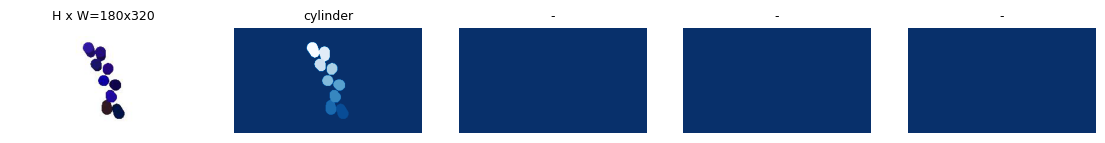

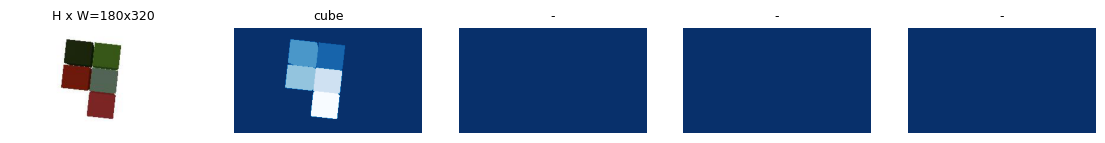

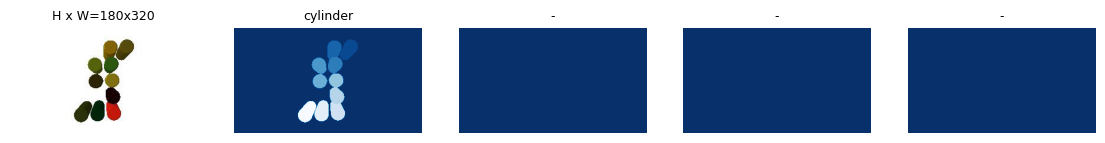

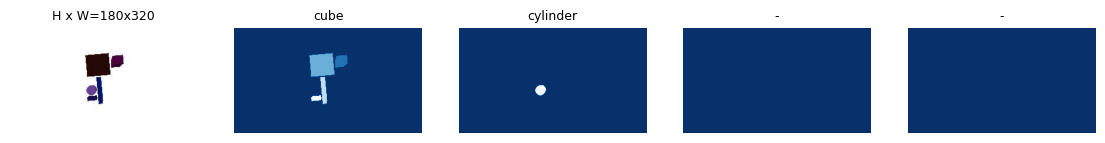

In [ ]:
import random
import cv2
import math
import copy

dataset_dir=image_name

def get_list_idx_validate(percentage=80,images_dir=None):
        if images_dir==None:
            images_dir = dataset_dir + '/rgb/'#'/depth/'
        images_indir=copy.deepcopy(os.listdir(images_dir))
        num_images=len(images_indir)
        num_images_totrainon=int(num_images*percentage/100)
        list_idx_validate=[i for i in range(num_images)]
        for a in range(num_images_totrainon):
            idxtodel=random.randint(0,len(list_idx_validate)-1)
            del list_idx_validate[idxtodel]
        return list_idx_validate

list_idx_validate=get_list_idx_validate()

# Train
dataset_train = ShapesDataset()
dataset_train.load_dataset(dataset_dir=dataset_dir, is_train=True,list_idx_validate=list_idx_validate)
dataset_train.prepare()

# Validation
dataset_val = ShapesDataset()
dataset_val.load_dataset(dataset_dir=dataset_dir, is_train=False,list_idx_validate=list_idx_validate)
dataset_val.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 4)

print('Train', len(dataset_train.image_ids))
print('Validation', len(dataset_val.image_ids))

for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

### Training Model Generation

In [ ]:
model = modellib.MaskRCNN(
    mode="training",
    config=config,
    model_dir=MODEL_DIR)

model.load_weights(
    COCO_MODEL_PATH,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

## TRAINING


### 1. Head Only

First stage : Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass layers='heads' to the train() function.

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE/2, 
    epochs=20, 
    layers='heads')

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')


Starting at epoch 0. LR=0.0005

Checkpoint Path: Mask_RCNN/logs/shapes20230407T1430/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDist

/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/GatherV2_5:0", 

30/30 [==============================] - ETA: 0s - batch: 14.5000 - size: 8.0000 - loss: 2.6707 - rpn_class_loss: 0.0751 - rpn_bbox_loss: 0.8658 - mrcnn_class_loss: 0.4911 - mrcnn_bbox_loss: 0.8969 - mrcnn_mask_loss: 0.3418

/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


30/30 [==============================] - 113s 3s/step - batch: 14.5000 - size: 8.0000 - loss: 2.6707 - rpn_class_loss: 0.0751 - rpn_bbox_loss: 0.8658 - mrcnn_class_loss: 0.4911 - mrcnn_bbox_loss: 0.8969 - mrcnn_mask_loss: 0.3418 - val_loss: 1.7061 - val_rpn_class_loss: 0.0339 - val_rpn_bbox_loss: 0.8370 - val_mrcnn_class_loss: 0.1278 - val_mrcnn_bbox_loss: 0.4425 - val_mrcnn_mask_loss: 0.2649
Epoch 2/20
30/30 [==============================] - 26s 883ms/step - batch: 14.5000 - size: 8.0000 - loss: 1.4531 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.7348 - mrcnn_class_loss: 0.1224 - mrcnn_bbox_loss: 0.3500 - mrcnn_mask_loss: 0.2124 - val_loss: 1.4568 - val_rpn_class_loss: 0.0244 - val_rpn_bbox_loss: 0.7762 - val_mrcnn_class_loss: 0.1132 - val_mrcnn_bbox_loss: 0.3432 - val_mrcnn_mask_loss: 0.1998
Epoch 3/20
30/30 [==============================] - 25s 842ms/step - batch: 14.5000 - size: 8.0000 - loss: 1.1344 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.6423 - mrcnn_class_loss: 0.0782 - mrc

### 2. All layers

Optional

Second stage: Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass layers="all to train all layers.

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE / 20,
    epochs=30, 
    layers="all")

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')


Starting at epoch 20. LR=5e-05

Checkpoint Path: Mask_RCNN/logs/shapes20230407T1430/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b        

/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training_2/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training_2/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training_2/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training_2/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training_2/SGD/gradients/gradients/roi_align_classifier_1/concat_grad/Gathe

30/30 [==============================] - ETA: 0s - batch: 14.5000 - size: 8.0000 - loss: 1.3221 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3891 - mrcnn_class_loss: 0.0665 - mrcnn_bbox_loss: 0.0808 - mrcnn_mask_loss: 0.1101

/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


30/30 [==============================] - 69s 1s/step - batch: 14.5000 - size: 8.0000 - loss: 1.3221 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.3891 - mrcnn_class_loss: 0.0665 - mrcnn_bbox_loss: 0.0808 - mrcnn_mask_loss: 0.1101 - val_loss: 1.7119 - val_rpn_class_loss: 0.0140 - val_rpn_bbox_loss: 0.5216 - val_mrcnn_class_loss: 0.0694 - val_mrcnn_bbox_loss: 0.1244 - val_mrcnn_mask_loss: 0.1266
Epoch 22/30
30/30 [==============================] - 34s 1s/step - batch: 14.5000 - size: 8.0000 - loss: 1.1232 - rpn_class_loss: 0.0109 - rpn_bbox_loss: 0.3133 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0706 - mrcnn_mask_loss: 0.1111 - val_loss: 1.9232 - val_rpn_class_loss: 0.0184 - val_rpn_bbox_loss: 0.6377 - val_mrcnn_class_loss: 0.0704 - val_mrcnn_bbox_loss: 0.1137 - val_mrcnn_mask_loss: 0.1213
Epoch 23/30
30/30 [==============================] - 35s 1s/step - batch: 14.5000 - size: 8.0000 - loss: 1.1772 - rpn_class_loss: 0.0135 - rpn_bbox_loss: 0.3368 - mrcnn_class_loss: 0.0634 - mrcnn_bb

## INFERENCE

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
#model_path = os.path.join(ROOT_DIR, "/logs/mask_rcnn_shapes.h5")
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
#model_path = model.find_last()


# Load trained weights
print("Loading weights from ", model_path)
#model.load_weights(model_path, by_name=True)
model.load_weights(
    model_path, by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask", "rpn_model"])


Instructions for updating:
Use fn_output_signature instead


Loading weights from  Mask_RCNN/logs/mask_rcnn_shapes.h5


In [ ]:
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #DETECTION_MIN_CONFIDENCE = 0.85

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(
    mode="inference", 
    config=inference_config,
    model_dir=MODEL_DIR)

model_path = test_model.find_last()
print(model_path)

test_model.load_weights(model_path, by_name=True)

Mask_RCNN/logs/shapes20230407T1430/mask_rcnn_shapes_0030.h5
Re-starting from epoch 30


Processing 1 images
image                    shape: (320, 320, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  320.00000  int64
anchors                  shape: (1, 25575, 4)         min:   -0.28373  max:    1.08310  float32


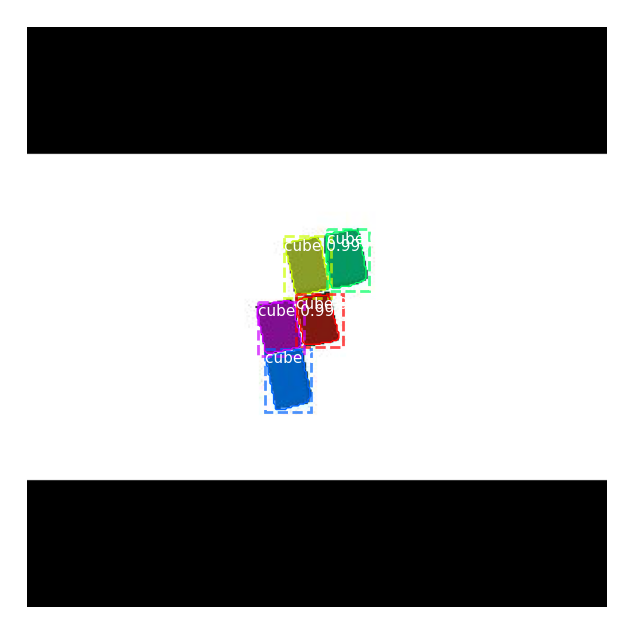

In [ ]:
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id)

results = test_model.detect([original_image], verbose=1)
r = results[0]

visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(16, 8))



In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp Mask_RCNN/logs/mask_rcnn_shapes.h5 /content/drive/MyDrive